# Support Vector Machine (SVM)

## Importing the libraries

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [163]:
dataset = pd.read_csv('final_complete_hourly_data_2016_2019.csv')
#dataset = pd.read_csv('jan_2016_to_march_2016_data.csv')
X = dataset.iloc[:, 1:-3].values
y = dataset.iloc[:, -1].values

In [164]:
dataset

,df,tempr,ap,ws,rh,blizzard
0,01-01-2016 00:00,1.16,980.83,8.27,67.60,0
1,01-01-2016 01:00,1.35,980.95,10.91,65.30,0
2,01-01-2016 02:00,1.53,981.07,8.59,64.70,0
3,01-01-2016 03:00,1.43,981.37,8.18,66.10,0
4,01-01-2016 04:00,1.24,981.66,9.19,73.86,0
...,...,...,...,...,...,...
44683,04-02-2021 19:00,-4.58,975.76,3.17,60.35,0
44684,04-02-2021 20:00,-3.88,975.98,5.95,51.05,0
44685,04-02-2021 21:00,-4.50,976.21,7.17,49.89,0
44686,04-02-2021 22:00,-4.98,976.44,7.22,50.56,0


In [165]:
X

array([[  1.16, 980.83],
       [  1.35, 980.95],
       [  1.53, 981.07],
       ...,
       [ -4.5 , 976.21],
       [ -4.98, 976.44],
       [ -4.93, 976.67]])

In [166]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Splitting the dataset into the Training set and Test set

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [168]:
print(X_train)

[[ -10.45  974.54]
 [ -20.5   984.37]
 [  -4.5   973.83]
 ...
 [  -3.46  971.67]
 [   2.    977.88]
 [ -19.94 1004.16]]


In [169]:
print(y_train)

[0 0 0 ... 0 0 0]


In [170]:
print(X_test)

[[-14.42 981.88]
 [ -5.88 973.21]
 [-12.29 961.44]
 ...
 [-10.4  970.38]
 [-15.62 981.53]
 [-15.15 983.61]]


In [171]:
print(y_test)

[0 0 0 ... 0 0 0]


## Feature Scaling

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [173]:
print(X_train)

[[-0.10664261 -0.64663049]
 [-1.37720418  0.41828083]
 [ 0.6455804  -0.72354677]
 ...
 [ 0.7770614  -0.95754559]
 [ 1.46733664 -0.28479897]
 [-1.30640672  2.56218672]]


In [174]:
print(X_test)

[[-0.60854604  0.14853219]
 [ 0.47111523 -0.79071309]
 [-0.33926284 -2.06579002]
 ...
 [-0.10032141 -1.09729489]
 [-0.76025488  0.11061571]
 [-0.70083558  0.33594791]]


## Training the SVM model on the Training set

In [175]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

In [176]:
#print(classifier.predict(sc.transform([[-10.09,972.98]])))

## Predicting the Test set results

In [177]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [178]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10957     0]
 [  215     0]]


0.9807554600787683

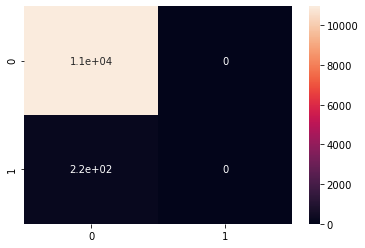

In [179]:
import seaborn as sns
sns.heatmap(cm, annot=True)

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


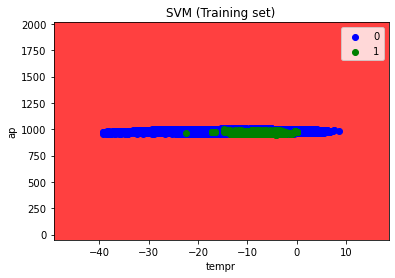

In [180]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('tempr')
plt.ylabel('ap')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


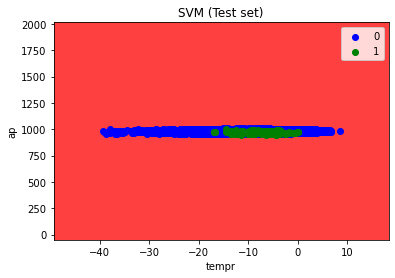

In [181]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('tempr')
plt.ylabel('ap')
plt.legend()
plt.show()